#Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix
import seaborn as sns

np.random.seed(0)

#Data

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


#Visualize Examples

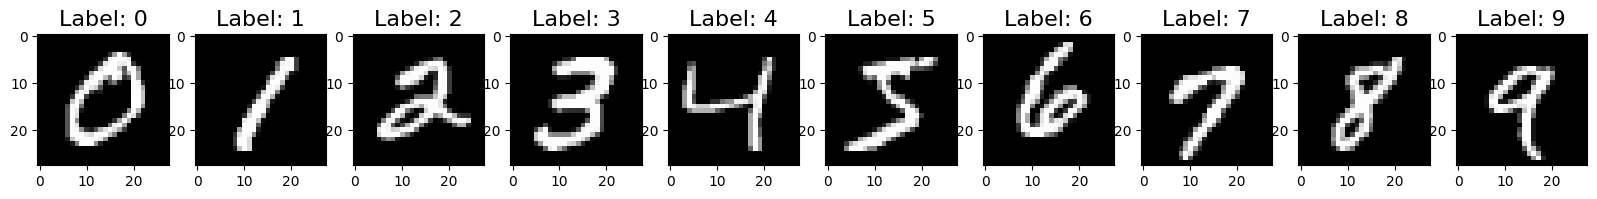

In [5]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap = 'gray')
  ax[i].set_title("Label: {}".format(i),fontsize = 16)

In [6]:
for i in range(10):
  print(y_train[i])

5
0
4
1
9
2
1
3
1
4


In [7]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [8]:
for i in range(10):
  print(y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


#Prepare Data

In [9]:
#Normalizing Data:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
#Reshape Data:
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print(x_train.shape)

(60000, 784)


#Crating the Model - Fully Connected Neural Network

In [11]:
model = Sequential()

model.add(Dense(units = 128, input_shape = (784,), activation='relu'))
model.add(Dense(units = 128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 10, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

#Training

In [12]:
batch_size = 512
epochs = 10
model.fit(x = x_train, y = y_train, batch_size = batch_size, epochs = epochs)

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.6824 - loss: 1.0337
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9303 - loss: 0.2400
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9506 - loss: 0.1709
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9602 - loss: 0.1365
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9693 - loss: 0.1068
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9736 - loss: 0.0922
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.9762 - loss: 0.0801
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9802 - loss: 0.0666
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9829 - loss: 0.0584
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9839 - loss: 0.0528


#Evaluate

In [13]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print("Test loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9743 - loss: 0.0815
Test loss: 0.06974662840366364, Test Accuracy: 0.9782999753952026


In [14]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis = 1)
print(y_pred)
print(y_pred_classes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[1.0819292e-06 8.6507544e-07 2.0635212e-04 ... 9.9935752e-01
  3.1245634e-06 2.8375123e-06]
 [2.2775463e-08 3.2304652e-04 9.9966419e-01 ... 1.3988553e-09
  7.2965318e-09 1.4782677e-11]
 [1.3379717e-05 9.9825114e-01 1.5791335e-04 ... 7.8092190e-04
  9.2083254e-05 1.2899879e-05]
 ...
 [6.2845779e-10 2.3151996e-08 6.4733295e-11 ... 9.8031626e-07
  8.2320321e-07 1.6272929e-04]
 [1.4008878e-08 1.3517629e-09 1.7083834e-10 ... 3.6070049e-09
  3.9448473e-06 1.5399592e-09]
 [1.1880454e-08 2.1043698e-12 4.7215043e-08 ... 3.6148674e-11
  6.3027507e-11 4.2813215e-11]]
[7 2 1 ... 4 5 6]


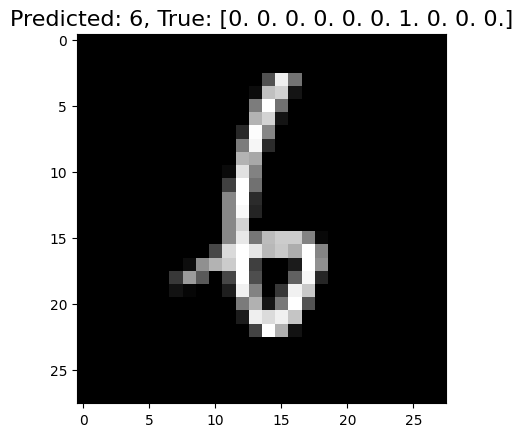

In [15]:
#Single Example:

random_idx = np.random.choice(len(x_test))
x_sample = x_test[random_idx]
y_true = np.argmax(y_test, axis =1)
y_sample_true = y_test[random_idx]
y_sample_pred_class = y_pred_classes[random_idx]

plt.title("Predicted: {}, True: {}".format(y_sample_pred_class, y_sample_true), fontsize = 16)
plt.imshow(x_sample.reshape(28,28),cmap = 'gray')

#Confusion Matrix

Text(0.5, 1.0, 'Confusion Matrix')

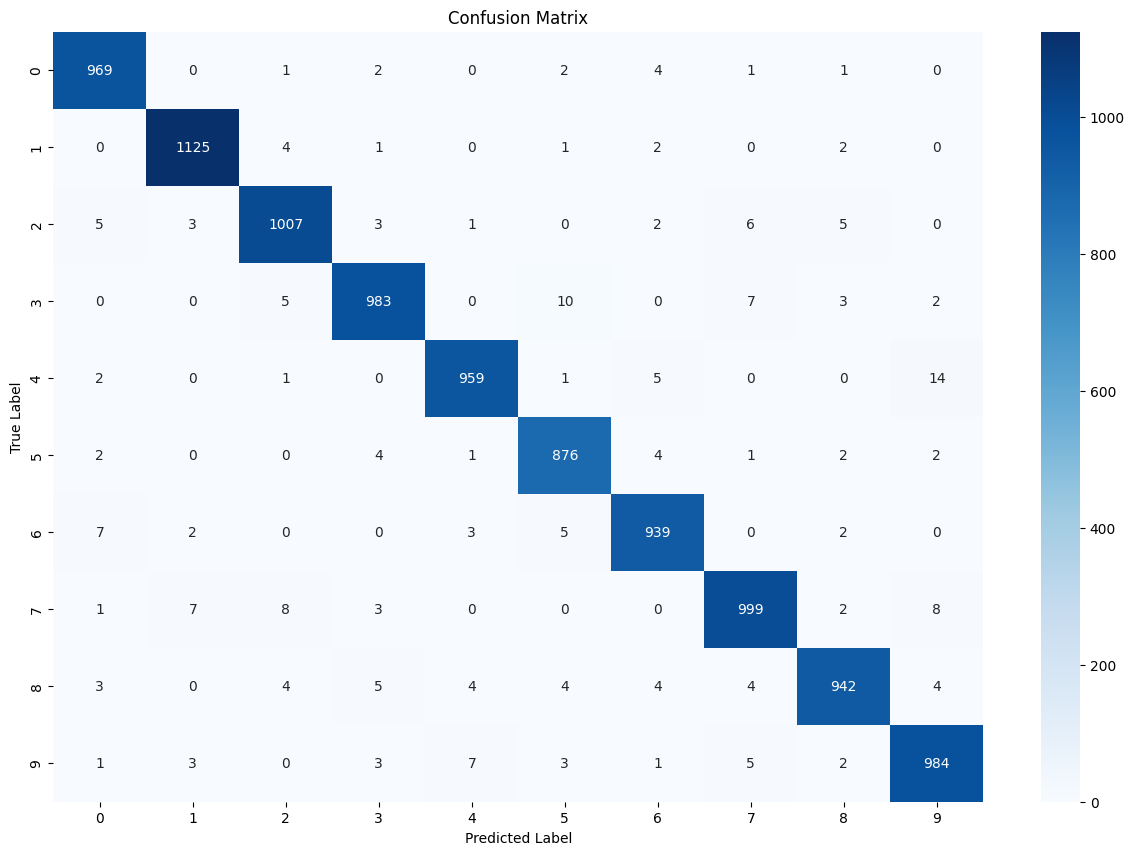

In [16]:
confusion_mtx = confusion_matrix(y_true, y_pred_classes)
#plot
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(confusion_mtx, annot = True,fmt = 'd', ax = ax, cmap = 'Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix')

#Investigate Some Erros

In [17]:
errors = (y_pred_classes - y_true != 0)
y_pred_classes_errors = y_pred_classes[errors]
y_pred_errors = y_pred[errors]
y_true_errors = y_true[errors]
x_test_errors = x_test[errors]

In [18]:
y_pred_errors_probability = np.max(y_pred_errors,axis =1)
true_probability_errors = np.diagonal(np.take(y_pred_errors, y_true_errors, axis = 1))
diff_errors_pred_true = y_pred_errors_probability - true_probability_errors

#Get list of indices of sorted diffrences
sorted_idx_diff_errors = np.argsort(diff_errors_pred_true)
top_idx_diff_errors = sorted_idx_diff_errors[-5:] # last 5

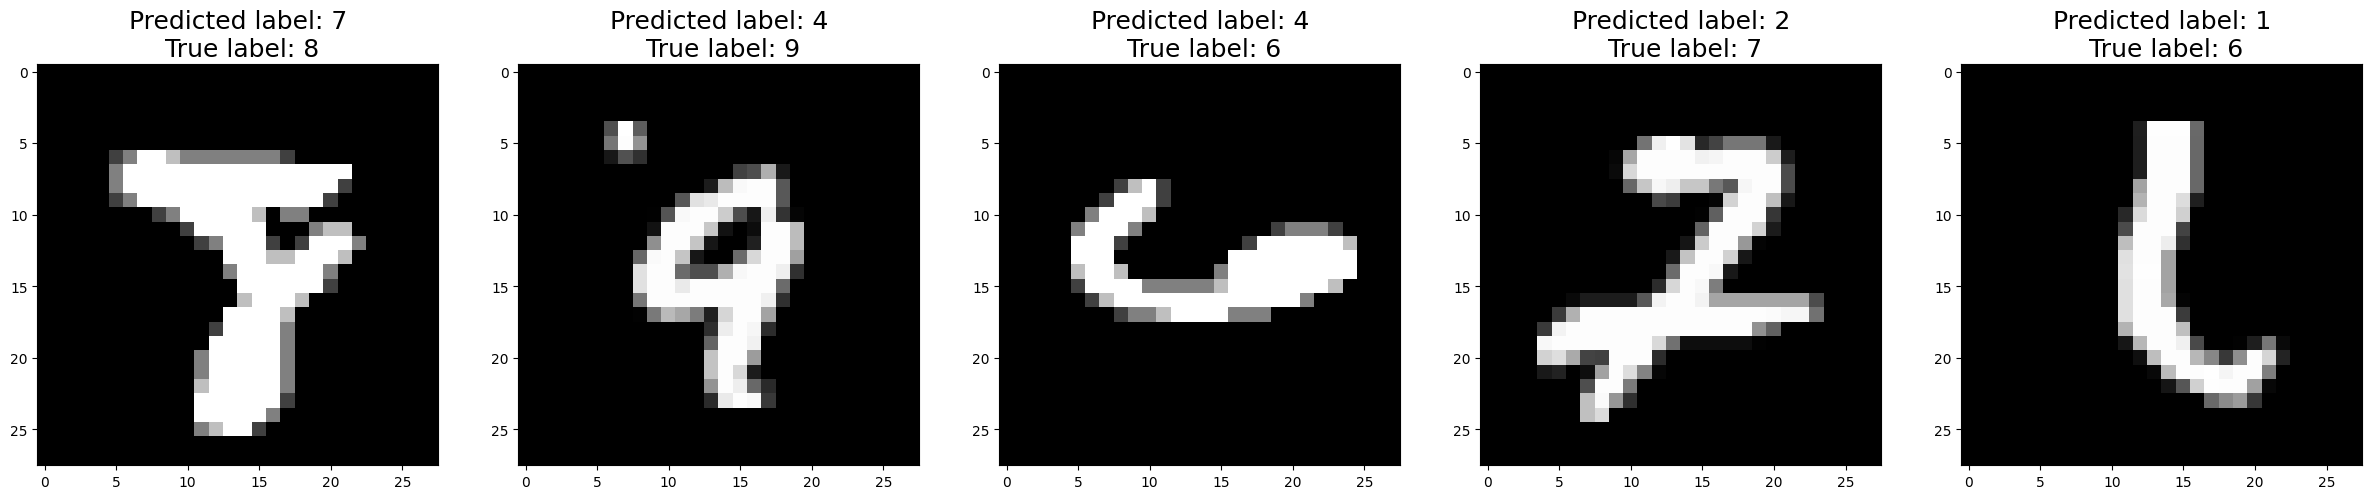

In [19]:
#show top errors:
num = len(top_idx_diff_errors)
f, ax = plt.subplots(1, num, figsize = (30,30))

for i in range(0, num):
  idx = top_idx_diff_errors[i]
  sample = x_test_errors[idx].reshape(28,28)
  y_t = y_true_errors[idx]
  y_p = y_pred_classes_errors[idx]
  ax[i].imshow(sample, cmap = 'gray')
  ax[i].set_title("Predicted label: {}\n True label: {}".format(y_p, y_t), fontsize = 18)

In [20]:
model.save("mnist_model.h5")